In [30]:
import pandas as pd

pd.options.mode.chained_assignment = None
file_path = "Dataset/preprocessed_data.csv"
# read csv
df = pd.read_csv(file_path)
crimes_we_need = ["LARCENY/THEFT", "ASSAULT", "DRUG/NARCOTIC", "VEHICLE THEFT", "BURGLARY"]
filter_df = df[df['Category'].isin(crimes_we_need)]
# this code may take a while
filter_df['Dates'] = pd.to_datetime(filter_df['Dates'], infer_datetime_format=True)
filter_df

C:\Users\HassanAlhawari\AppData\Local\Temp\ipykernel_11944\3609152781.py:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  filter_df['Dates'] = pd.to_datetime(filter_df['Dates'], infer_datetime_format=True)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,quarter,month,day,hour
0,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,2,5,13,23
1,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,2,5,13,23
2,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,2015,2,5,13,23
3,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,2015,2,5,13,23
4,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,2015,2,5,13,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395397,2003-01-06 00:55:00,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Monday,NORTHERN,NONE,1300 Block of WEBSTER ST,-122.431046,37.783030,2003,1,1,6,0
395398,2003-01-06 00:33:00,ASSAULT,INFLICT INJURY ON COHABITEE,Monday,MISSION,NONE,2800 Block of FOLSOM ST,-122.414073,37.751685,2003,1,1,6,0
395399,2003-01-06 00:20:00,ASSAULT,ATTEMPTED HOMICIDE WITH A GUN,Monday,BAYVIEW,"ARREST, BOOKED",1500 Block of SHAFTER AV,-122.389769,37.730564,2003,1,1,6,0
395400,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,1,6,0


In [31]:
# Introducing a "political direction" feature to examine whether crime rates correlate
# with specific governmental policies
# George W. Bush (Republican Party)
# Term: January 2001 - January 2009
# Barack Obama (Democratic Party)
# Term: January 2009 - January 2017 (Forrest and Michael, 2023)

filter_df['POLITICAL DIRECTION'] = filter_df['Dates'].map(lambda x: 'REPUBLIC' if  (x.year < 2009 or  (x.year == 2009 and x.month == 1 and x.day <= 20)) else 'DEMOCRATIC')

filter_df

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,quarter,month,day,hour,POLITICAL DIRECTION
0,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,2,5,13,23,DEMOCRATIC
1,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,2,5,13,23,DEMOCRATIC
2,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,2015,2,5,13,23,DEMOCRATIC
3,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,2015,2,5,13,23,DEMOCRATIC
4,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,2015,2,5,13,23,DEMOCRATIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395397,2003-01-06 00:55:00,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Monday,NORTHERN,NONE,1300 Block of WEBSTER ST,-122.431046,37.783030,2003,1,1,6,0,REPUBLIC
395398,2003-01-06 00:33:00,ASSAULT,INFLICT INJURY ON COHABITEE,Monday,MISSION,NONE,2800 Block of FOLSOM ST,-122.414073,37.751685,2003,1,1,6,0,REPUBLIC
395399,2003-01-06 00:20:00,ASSAULT,ATTEMPTED HOMICIDE WITH A GUN,Monday,BAYVIEW,"ARREST, BOOKED",1500 Block of SHAFTER AV,-122.389769,37.730564,2003,1,1,6,0,REPUBLIC
395400,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,1,6,0,REPUBLIC


In [32]:
# We possess a dataset depicting the weather conditions in San Francisco (Zoni Nation, 2016). #
# However, before delving into the analysis, a series of preprocessing steps is required to #
# filter out extraneous weather data.

#weather_file_path = "C:/Users/HassanAlhawari/OneDrive - JAEMACOM GmbH/Desktop/sf-crime/weather_sanfrancisco.csv"

weather_file_path = "Dataset/weather_sanfrancisco_filtered.csv"

weather_df = pd.read_csv(weather_file_path)
weather_df['Date'] = pd.to_datetime(weather_df['Date'], infer_datetime_format=True)
filter_weather_df = weather_df[weather_df['Date'].dt.year >= 2003]

# filter_weather_df.to_csv('weather_sanfrancisco_filtered.csv', index=False)

C:\Users\HassanAlhawari\AppData\Local\Temp\ipykernel_11944\368440672.py:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_df['Date'] = pd.to_datetime(weather_df['Date'], infer_datetime_format=True)


In [33]:
# We are currently in the process of integrating two datasets. Specifically, we are extracting
# Temperature, Humidity, Events and Season information from the weather dataset and merging it
# with the crime datasets by Dates


filter_df['temp_Date'] = pd.to_datetime(filter_df['Dates'].dt.strftime('%Y-%m-%d'))
filter_df = pd.merge(filter_df, filter_weather_df[['Date','Min.TemperatureF', 'Mean.TemperatureF','Max.TemperatureF','Mean.Humidity','Events', 'season']], left_on='temp_Date', right_on='Date', how='left')
filter_df.drop(['Date', 'temp_Date'], axis=1, inplace=True)

    # The new overwritten Dataset contains 2 features {Political Directions and Weather data}

In [34]:
print(filter_df.dtypes)

Dates                  datetime64[ns]
Category                       object
Descript                       object
DayOfWeek                      object
PdDistrict                     object
Resolution                     object
Address                        object
X                             float64
Y                             float64
year                            int64
quarter                         int64
month                           int64
day                             int64
hour                            int64
POLITICAL DIRECTION            object
Min.TemperatureF              float64
Mean.TemperatureF             float64
Max.TemperatureF                int64
Mean.Humidity                 float64
Events                         object
season                         object
dtype: object


<Figure size 1000x800 with 0 Axes>

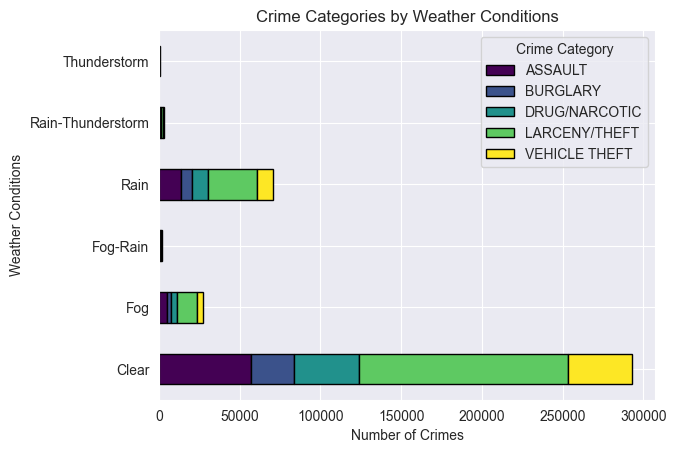

In [35]:
# Let us undertake a data visualization analysis to elucidate the correlation between crime
# rates and specific meteorological conditions

import matplotlib.pyplot as plt
filter_df['Events'].fillna('Clear', inplace=True)
grouped_data = filter_df.groupby('Events')['Category'].value_counts().unstack()

plt.figure(figsize=(10, 8))
grouped_data.plot(kind='barh', stacked=True, colormap='viridis', edgecolor='black')
plt.title('Crime Categories by Weather Conditions')
plt.xlabel('Number of Crimes')
plt.ylabel('Weather Conditions')
plt.legend(title='Crime Category')

plt.show()

In [36]:
# Crime rates show a distinct pattern based on weather conditions. More crimes tend to happen
# during clear weather, followed by an increase during rainy days as the second most common
# scenario. Foggy conditions come next, ranking third in terms of crime frequency. Surprisingly
# the fewest crimes occur during thunderstorms, presenting a notable contrast to other weather
# situations.

In [37]:
# We are creating the contingence table for further research
contingency_table = pd.crosstab(filter_df['Category'], filter_df['Events'])
print(contingency_table)

Events          Clear    Fog  Fog-Rain   Rain  Rain-Thunderstorm  Thunderstorm
Category                                                                      
ASSAULT         56866   5137       298  13696                599            38
BURGLARY        26949   2490       142   6713                281            21
DRUG/NARCOTIC   39874   3634       240   9726                455            24
LARCENY/THEFT  129629  12251       683  30659               1231           129
VEHICLE THEFT   39470   3542       255   9896                450            24


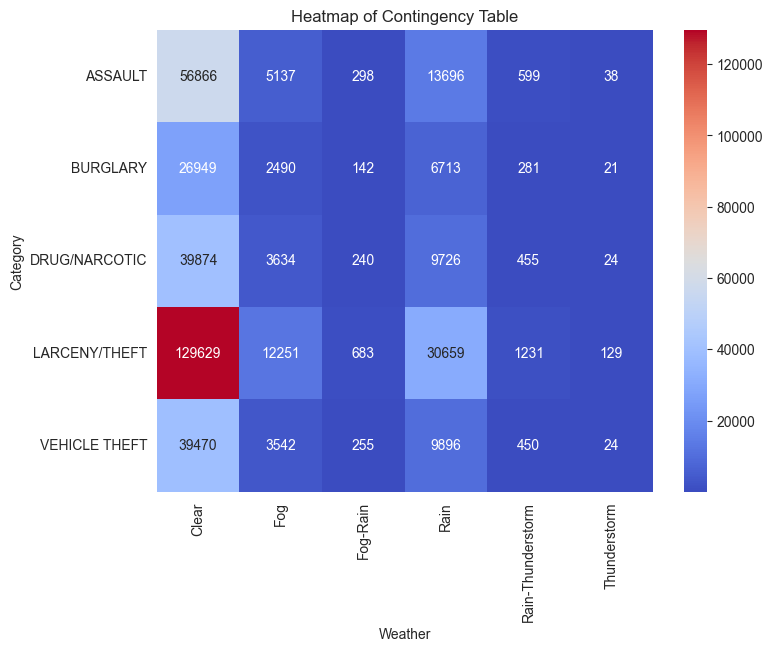

In [38]:
# Here is a heatmap which provides a visual representation that allows us to discern the #
# association between two categorical variables.
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title('Heatmap of Contingency Table')
plt.xlabel('Weather')
plt.ylabel('Category')
plt.show()

In [39]:
# Now we're more curious about whether weather has any impact on crime rates. To find out, #
# let's use the Chi-Square (Chi²) test to see if there's a meaningful connection between two #
# things: Weather and Crimes. (Metha, 2022)

# We are using the chi2_contingency package which is useful to calculate the p-value
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Quadrat-Wert: {chi2}")
print(f"P-Wert: {p}")


Chi-Quadrat-Wert: 81.84100952182226
P-Wert: 1.907560709348357e-09


In [40]:
# The Chi-Square test shows a strong association between crime categories and weather #
# condition. Typically less than 0.05 indicates that the observed association is unlikely to #
# be due to random chance (actual value: 1.1912442344550702e-09 smaller than 0.05), leading to#
# the rejection of # the null hypothesis. In summary, there is a significant relationship #
# between crime categories and weather conditions in the dataset. Since we dont know how #
# strong the relationship is, we will look further into it with Cramérs V-Value. (bhuwanesh, 2022)

import numpy as np

X2 = chi2_contingency(contingency_table, correction=False)[0]
N = np.sum(contingency_table)
minimum_dimension = min(contingency_table.shape)-1

# result of Cramers V
cramers_v = np.sqrt((X2/N) / minimum_dimension)
cramers_v


Events
Clear                0.008359
Fog                  0.027500
Fog-Rain             0.112452
Rain                 0.017013
Rain-Thunderstorm    0.082364
Thunderstorm         0.294442
dtype: float64

In [41]:
# The strongest association appears to be with "Thunderstorm" for all crime categories, #
# indicating a relatively strong relationship between the occurrence of thunderstorms and the #
# different types of crimes. The other associations are generally weaker, with "Clear" and #
# "Rain" showing little or no association for most crime categories.

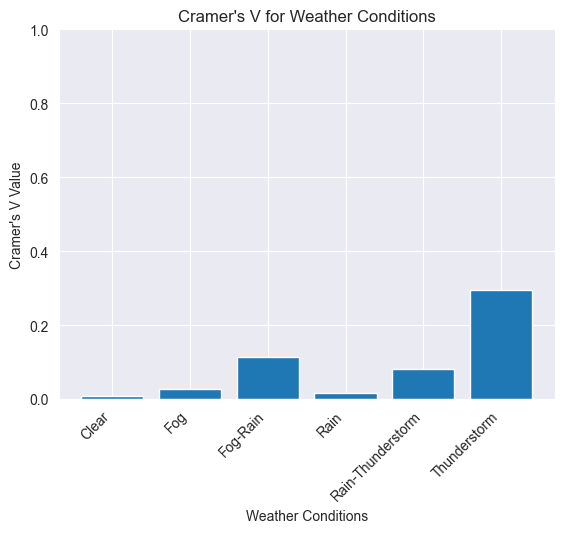

In [42]:
# We will visualize the strength from Cramer's V
labels = contingency_table.columns
plt.bar(labels, cramers_v)
plt.xlabel('Weather Conditions')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

plt.ylabel("Cramer's V Value")
plt.title("Cramer's V for Weather Conditions")
plt.show()

In [43]:
# We can see that the weather plays in some way a role in crimes. We used a method called #
# Chi-Square to check the connection between crimes and different weather conditions. It turns
# out that most crimes happen when the weather is clear. But when we used Cramer's #
# calculation, we found something interesting – Thunderstorms are linked the strongest with #
# crimes. This tells us that the kind of weather somehow matters when it comes to crime. #
# Having explored the impact of weather conditions, we will now shift our focus to another #
# feature: 'political directions'.


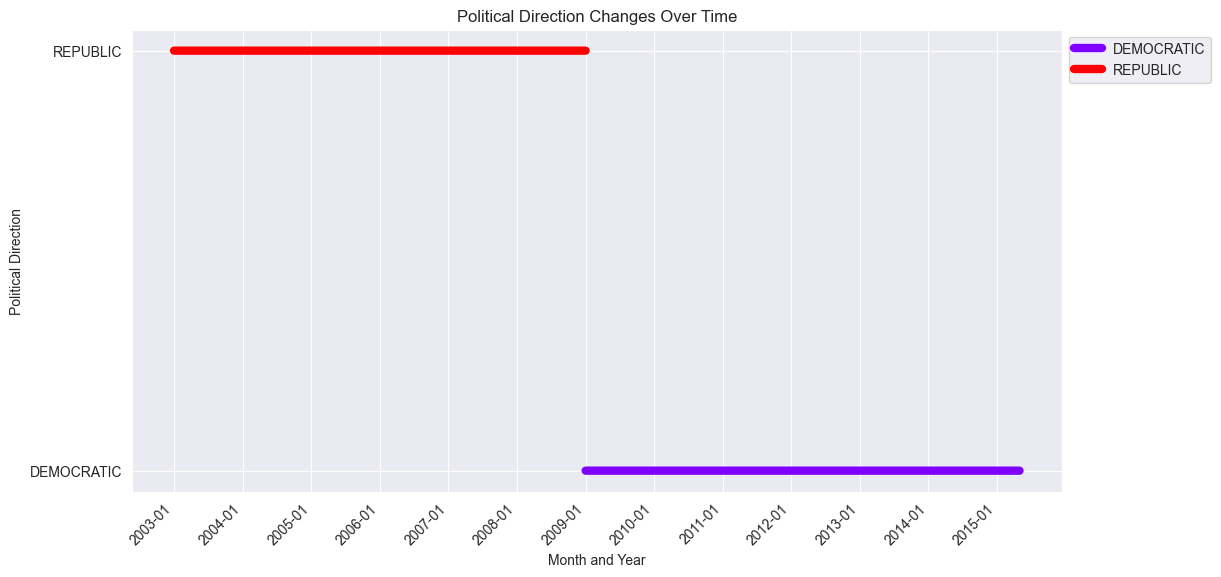

In [44]:
# First lets visualize the political direction to show what politcal power were present at #
# that time
import matplotlib.dates as mdates

# We group the date in months and convert it to timestamp
filter_df['MonthYear'] = filter_df['Dates'].dt.to_period('M')
filter_df['MonthNumeric'] = filter_df['MonthYear'].dt.to_timestamp()

# We define color for each unique political direction 'Democratic' and 'Republic'
unique_directions = filter_df['POLITICAL DIRECTION'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_directions)))

plt.figure(figsize=(12, 6))
# Here we are drawing our plot
for i, direction in enumerate(unique_directions):
    subset = filter_df[filter_df['POLITICAL DIRECTION'] == direction]
    plt.plot(subset['MonthNumeric'], subset['POLITICAL DIRECTION'], color=colors[i], label=direction, linewidth=6)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.xticks(rotation=45, ha='right')
plt.title('Political Direction Changes Over Time')
plt.xlabel('Month and Year')
plt.ylabel('Political Direction')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Since we don't need these columns anymore we will drop them
filter_df.drop(['MonthYear', 'MonthNumeric'], axis=1, inplace=True)


In [45]:
# Both political parties ruled for the same amount of time, and this is crucial when examining:
# The number of crimes that occurred.
# Now, let's summarize the total crimes during the regimes of the two political parties.

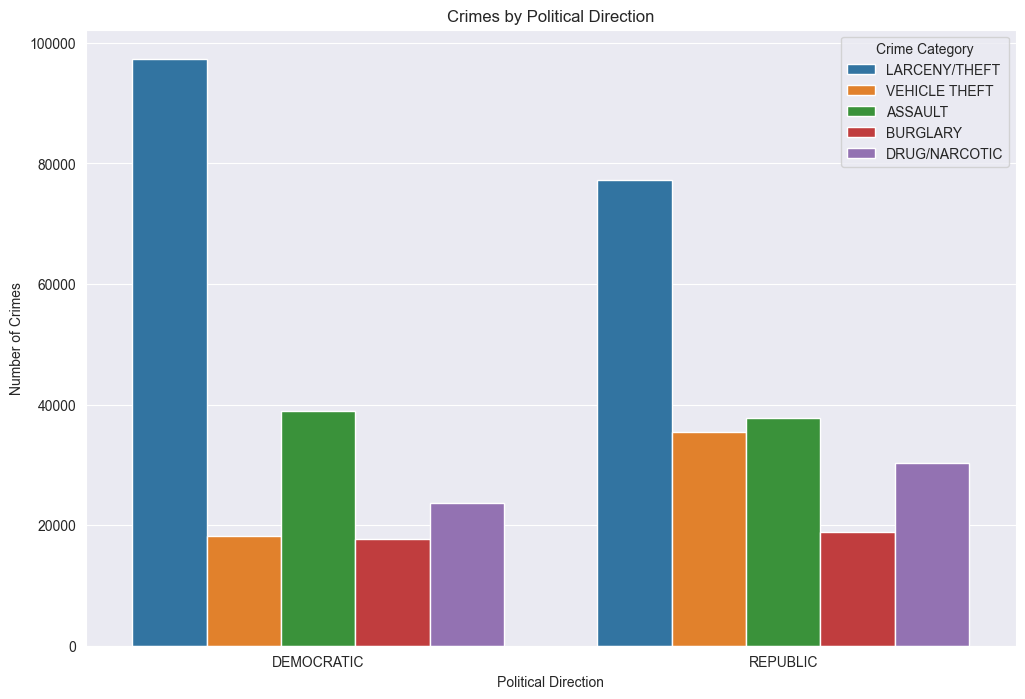

In [46]:
filter_df

plt.figure(figsize=(12, 8))
sns.countplot(x='POLITICAL DIRECTION', hue='Category', data=filter_df)
plt.title('Crimes by Political Direction')
plt.xlabel('Political Direction')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Category', loc='upper right')
plt.show()

In [47]:
# Analysis of crime data reveals that the highest occurrences of 'Larceny/Theft' were observed
# during the democratic regime, whereas 'Vehicle Theft' incidents were comparatively lower #
# than in the Republic regime. Incidences of 'Assault' and 'Burglary' remained nearly #
# consistent across both regimes. Furthermore, 'Drug/Narcotic' offenses showed a slight #
# decrease in the democratic regime.
# To determine whether political directions significantly influence crime rates, we will #
# conduct a Chi-Square test, building upon the insights gained from the earlier example.

In [48]:
# We need to create a contigence table with the political direction and crimes
contingency_table = pd.crosstab(filter_df['Category'], filter_df['POLITICAL DIRECTION'])
print(contingency_table)

POLITICAL DIRECTION  DEMOCRATIC  REPUBLIC
Category                                 
ASSAULT                   38907     37727
BURGLARY                  17735     18861
DRUG/NARCOTIC             23712     30241
LARCENY/THEFT             97317     77265
VEHICLE THEFT             18188     35449


In [49]:
# Now can use the Chi square test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Quadrat-Wert: {chi2}")
print(f"P-Wert: {p}")

Chi-Quadrat-Wert: 8667.238824970711
P-Wert: 0.0


In [50]:
# The chi-square test result of 8714.28 with a p-value of 0.0 indicates a strong connection #
# between the categories of "crimes" and "political directions." This suggests that there is a
# significant association or difference in the distribution of crimes across different #
# political directions. In simpler terms, it's likely that the type or frequency of crimes is #
# not random and is somehow linked to political directions. #
# Given the significant results from the chi-square test, we are now proceeding to calculate #
# Cramer's V to better quantify the strength of the observed association between "crimes" and #
# "political directions." #

In [51]:
X2 = chi2_contingency(contingency_table, correction=False)[0]
N = np.sum(contingency_table)
minimum_dimension = min(contingency_table.shape)-1

# result of Cramers V
cramers_v = np.sqrt((X2/N) / minimum_dimension)
cramers_v


POLITICAL DIRECTION
DEMOCRATIC    0.210363
REPUBLIC      0.208412
dtype: float64

In [52]:
# The Cramer's V values (0.210731 for "DEMOCRATIC" and 0.208713 for "REPUBLIC") suggest a weak
# association between the political direction of a regime and different crime categories. #
# While there is some connection, it's not a strong influence on the distribution of crime #
# types.

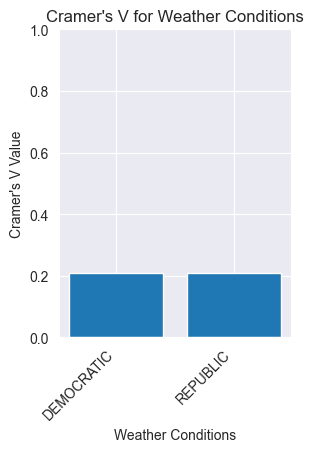

In [53]:
labels = contingency_table.columns

plt.figure(figsize=(3, 4))

plt.bar(labels, cramers_v)
plt.xlabel('Weather Conditions')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.ylabel("Cramer's V Value")
plt.title("Cramer's V for Weather Conditions")
plt.show()

In [68]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    print(chi2)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    print(r)
    print(k)
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

def correlation_with_target(df, target):
    correlations = {}
    for col in df.columns:
        if (col != target) & (col != "Descript"):
            correlation = cramers_v(df[target], df[col])
            correlations[col] = correlation
    return pd.Series(correlations)


target_variable = 'Category'
correlations_with_target = correlation_with_target(filter_df, target_variable)
print(correlations_with_target)

1053446.0684850118
5
216410
1998.5615875694648
5
7
72678.46797026377
5
10
189571.71883733608
5
17
362178.6509363719
5
21037
434089.29983185604
5
30703
434089.2998318561
5
30703
21232.68301201726
5
13
318.8587571186535
5
4
542.6771147062817
5
12
542.3290567372279
5
31
15625.237109626867
5
24
8667.238824970711
5
2
1646.0782778422536
5
36
1769.1925561136577
5
43
2262.6323664333695
5
52
2720.6865223671125
5
66
81.84100952182226
5
6
286.9555033045987
5
4
Dates                  0.344596
DayOfWeek              0.035334
PdDistrict             0.214313
Resolution             0.346152
Address                0.419278
X                      0.443638
Y                      0.443638
year                   0.115735
quarter                0.016084
month                  0.017757
day                    0.016341
hour                   0.099102
POLITICAL DIRECTION    0.148020
Min.TemperatureF       0.030859
Mean.TemperatureF      0.031818
Max.TemperatureF       0.036078
Mean.Humidity          0.039444
Ev

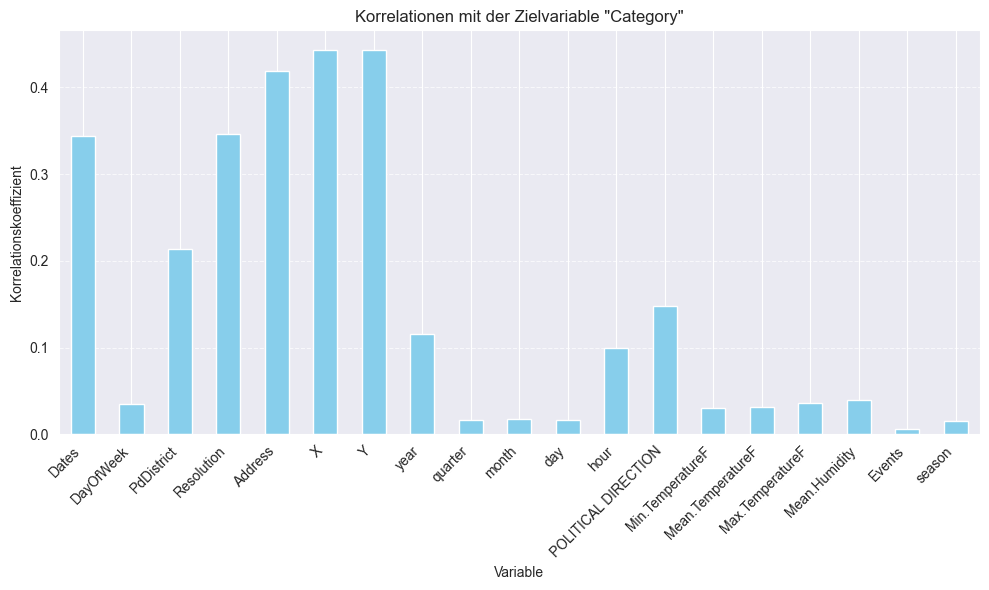

In [67]:
plt.figure(figsize=(10, 6))
correlations_with_target.plot(kind='bar', color='skyblue')
plt.title('Korrelationen mit der Zielvariable "Category"')
plt.xlabel('Variable')
plt.ylabel('Korrelationskoeffizient')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In der vorliegenden Cramér's V Korrelationsanalyse sind die Korrelationen zwischen verschiedenen Variablen und der Zielvariable "Category" dargestellt. Cramér's V ist ein Maß für die Assoziation zwischen zwei nominalen Variablen und kann Werte zwischen 0 und 1 annehmen, wobei 0 keine Assoziation und 1 eine perfekte Assoziation bedeutet.

Bei der Auswahl von Features für ein Modell basierend auf dieser Analyse würde man in der Regel jene Variablen berücksichtigen, die eine stärkere Korrelation mit der Zielvariable aufweisen, da diese wahrscheinlich mehr prädiktive Kraft haben. Es ist jedoch wichtig zu beachten, dass auch Features mit einer niedrigeren Korrelation nützlich sein können, besonders wenn sie einzigartige Informationen bieten, die nicht in anderen Variablen enthalten sind.

Aus dem Diagramm lassen sich folgende Beobachtungen machen:

Variablen wie "Address", "X", "Y", "hour" und "POLITICALDIRECTION" haben eine relativ höhere Korrelation mit der Zielvariable und könnten daher als wichtig für das Modell angesehen werden.
Andere Variablen wie "Dates", "DayOfWeek", "PdDistrict", "Resolution", "year", "quarter", "month", "TemperatureF", "Max_TemperatureF", "Min_TemperatureF", "Mean_Humidity", "Events" und "season" zeigen eine niedrigere Korrelation, könnten aber immer noch relevant sein, abhängig vom Kontext und der spezifischen Fragestellung.
Es ist auch wichtig, die Bedeutung jeder Variablen im Kontext der Daten und die Möglichkeit von Multikollinearität zu berücksichtigen, also der Korrelation von unabhängigen Variablen untereinander, was die Modellleistung beeinträchtigen kann.

Die Entscheidung, welche Features zu verwenden sind, sollte nicht allein auf der Basis von Korrelationskoeffizienten getroffen werden. Stattdessen sollte eine Kombination aus statistischer Analyse, Domain-Kenntnissen und möglicherweise Feature-Selection-Algorithmen verwendet werden.

In [55]:
filter_df.to_csv('train_with_feature.csv',index=False)

In [56]:
# We conducted an analysis of two external factors: weather conditions and political #
# directions. Our observations indicate that weather conditions exhibit a modest to minimal #
# association with crime occurrences. Conversely, political direction appears to have a #
# relatively weak influence on crime rates, as the association is notably feeble. To validate #
# these findings, we employed a chi-square test to assess the presence of an association, with
# the Cramer's V value used to gauge the strength of any identified associations.

In [57]:
# sources
# Mehta, Sourabh (2022). "How to use the Chi-Square Test for two categorical variables?". https://analyticsindiamag.com/how-to-use-the-chi-square-test-for-two-categorical-variables/
##
# bhuwanesh (2022). "How to Calculate Cramer’s V in Python?". https://www.geeksforgeeks.org/how-to-calculate-cramers-v-in-python/
##
# Zoni Nation (2016). "Weather CSV". https://github.com/zonination/weather-us/commits/master/sanfrancisco.csv
##
# McDonald, Forrest; Levy, Michael (2023). "Presidents of the United States". https://www.britannica.com/topic/presidency-of-the-United-States-of-America/Presidents-of-the-United-States

